In [1]:
###Importing the modules###

import numpy as np
import xarray as xr
import math as mt
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import glob
from metpy.plots import USCOUNTIES
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import metpy.calc as mpcalc
from metpy.units import units
from scipy import stats
from collections import Counter
from scipy.ndimage import gaussian_filter
from scipy.stats import t
import matplotlib as mpl
import cftime

print("Done importing modules")

Done importing modules


In [2]:
###Import the datasets###

#Large Domain dfs#
msl_All_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/msl_All_l0.nc')
msl_LP_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/msl_LP_l0.nc')
msl_HP_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/msl_HP_l0.nc')

t_850_All_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/t_850_All_l0.nc')
t_850_LP_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/t_850_LP_l0.nc')
t_850_HP_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/t_850_HP_l0.nc')

tcwv_All_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/tcwv_All_l0.nc')
tcwv_LP_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/tcwv_LP_l0.nc')
tcwv_HP_df = xr.open_dataset('/projects/zami4053/Synoptic_Research/Composite_NetCDFs/tcwv_HP_l0.nc')

tcwv_HP_df

<xarray.Dataset>
Dimensions:                        (latitude: 241, longitude: 281)
Coordinates:
  * latitude                       (latitude) float64 70.0 69.75 ... 10.25 10.0
  * longitude                      (longitude) float64 220.0 220.2 ... 290.0
Data variables:
    __xarray_dataarray_variable__  (latitude, longitude) float64 ...

In [3]:
###Perform some smoothing###

tcwv = mpcalc.smooth_gaussian(tcwv_HP_df['__xarray_dataarray_variable__'], 15)
t850 = mpcalc.smooth_gaussian(t_850_HP_df['__xarray_dataarray_variable__'], 15)
msl = mpcalc.smooth_gaussian(msl_HP_df['__xarray_dataarray_variable__'], 15)


/curc/sw/anaconda3/2020.11/envs/synoptic_f23/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/curc/sw/anaconda3/2020.11/envs/synoptic_f23/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contour(*args, **kwargs)
/curc/sw/anaconda3/2020.11/envs/synoptic_f23/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contour(*args, **kwargs)


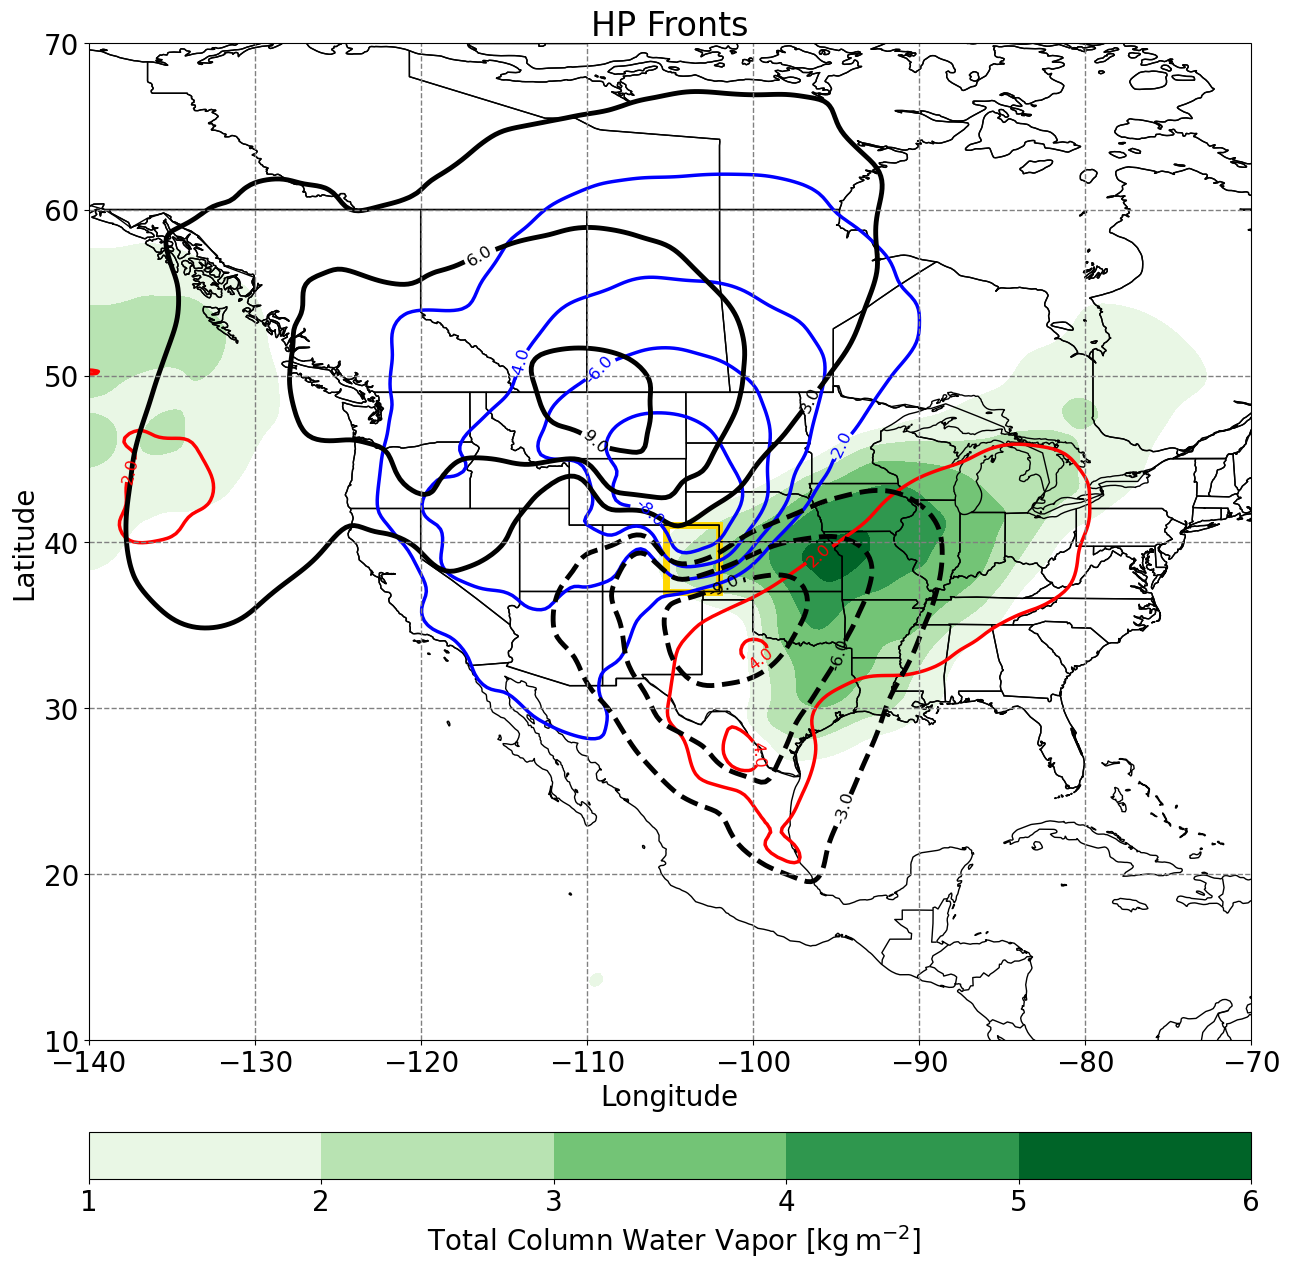

In [4]:
###Large Domain Composites HP###

#Set up the projection that will be used#
#mapcrs = ccrs.LambertConformal(central_longitude=-55, central_latitude=45, standard_parallels=(33, 45)) 
#mapcrs = ccrs.PlateCarree(central_longitude=-55)
#datacrs = ccrs.PlateCarree(central_longitude=-55)

#Start the figure and create plot axes with proper projection#
fig = plt.figure(1, figsize=(15, 20)) 
ax = plt.subplot(111, projection=ccrs.PlateCarree()) 
ax.set_extent([-140, -70, 10, 70], ccrs.PlateCarree())  #-110, -100, 35, 43 
gl = ax.gridlines(crs=ccrs.PlateCarree(),linestyle="--", linewidth=1, color='grey', alpha=1)

#Add geopolitical boundaries for map reference#
ax.add_feature(cfeature.LAND, facecolor="white") 
countries = NaturalEarthFeature(category="cultural", scale="110m", facecolor="none", name="admin_0_boundary_lines_land") 
ax.add_feature(countries, linewidth=1, edgecolor="black") 
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=1) 
ax.coastlines('50m', linewidth=1)

#Var and unit of interest to plot#
var_of_interest = 'MSLP'
unit_of_interest = 'kg/m^2'
time_lag= 0

#Extract the lons and lats#
lons = tcwv_All_df.longitude
lats = tcwv_All_df.latitude

#contour/cbar levels#
t850_levels_pos = np.arange(2, 13, 2)
t850_levels_neg = np.arange(-10, 0, 2)
msl_levels_pos = np.arange(3, 16, 3)
msl_levels_neg = np.arange(-12, 0, 3)

#Add the fcontours#
#tcwv_cf = plt.contourf(lons, lats, tcwv_HP_df['__xarray_dataarray_variable__'], levels=tcwv_levels, cmap="RdBu", alpha=0.6, transform=ccrs.PlateCarree(), label="TCWV")
tcwv_pos_cf = plt.contourf(lons, lats, tcwv, levels=np.arange(1,7,1), cmap="Greens", alpha=1, linewidths=1.0, transform=ccrs.PlateCarree())
t_850_pos_c = plt.contour(lons, lats, t850, levels=t850_levels_pos, linestyles='solid', colors='red', alpha=1, linewidths=2.5, transform=ccrs.PlateCarree())
t_850_neg_c = plt.contour(lons, lats, t850, levels=t850_levels_neg, linestyles='solid', colors='blue', alpha=1, linewidths=2.5, transform=ccrs.PlateCarree())
msl_c_pos = plt.contour(lons, lats, msl/100, levels=msl_levels_pos, linestyles='solid', colors='black', alpha=1, linewidths=3.5, transform=ccrs.PlateCarree(), label="MSLP")
msl_c_neg = plt.contour(lons, lats, msl/100, levels=msl_levels_neg, linestyles='dashed', colors='black', alpha=1, linewidths=3.5, transform=ccrs.PlateCarree(), label="MSLP")

#Add labels to the contours#
plt.clabel(t_850_pos_c, inline=True, fontsize=12, fmt='%1.1f')
plt.clabel(t_850_neg_c, inline=True, fontsize=12, fmt='%1.1f')
plt.clabel(msl_c_pos, inline=True, fontsize=12, fmt='%1.1f')
plt.clabel(msl_c_neg, inline=True, fontsize=12, fmt='%1.1f')
#plt.clabel(tcwv_pos_c, inline=True, fontsize=8, fmt='%1.1f')

#Colorbar and contour labels#
cbld = fig.colorbar(tcwv_pos_cf, orientation='horizontal', pad=0.06, extendrect=True, aspect=25, shrink=1)
cbld.set_label(r' Total Column Water Vapor [$\mathrm{kg\,m^{-2}}$]', fontsize=20) 
cbld.ax.tick_params(labelsize=20) 

#Fix the lats and lon values#
#ax.set_xticks(range(-180, -70, 10), crs=ccrs.PlateCarree())
ax.set_yticks(range(10, 80, 10), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(range(-140, -60, 10), crs=ccrs.PlateCarree())

#Set labels for plot#
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
plt.title(f'HP Fronts', fontsize=24) 

#Colorado bounds#
lon_min, lon_max = -105.25, -102.05
lat_min, lat_max = 37.0, 41.0

#Create the rectangle in PlateCarree coordinates#
colorado_box = mpatches.Rectangle(
    xy=(lon_min, lat_min),
    width=lon_max - lon_min,
    height=lat_max - lat_min,
    edgecolor='gold',
    facecolor='none',
    linewidth=5,
    linestyle='solid',
    transform=ccrs.PlateCarree()  # Important! Ensures alignment with map
)

ax.add_patch(colorado_box)

#plt.savefig("LD_REV_HP.png", dpi=150, bbox_inches='tight', pad_inches=0.1)

plt.show()